In [1]:
###importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.shape  ###tells no of rows and coloumn in the dataset

(158, 12)

#Happiness rank depends on Happiness score we drop it.Everything is numbers so we drop country and region

In [4]:
data.drop(['Standard Error','Country','Region','Happiness Rank','Dystopia Residual'],axis=1,inplace=True)


In [5]:
data.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [6]:
data.shape

(158, 7)

In [7]:
data.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


In [8]:
#checking null values
data.isna().sum()


Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

In [9]:
data.dtypes   ###checking the datatype for the dataset

Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
dtype: object

<AxesSubplot:>

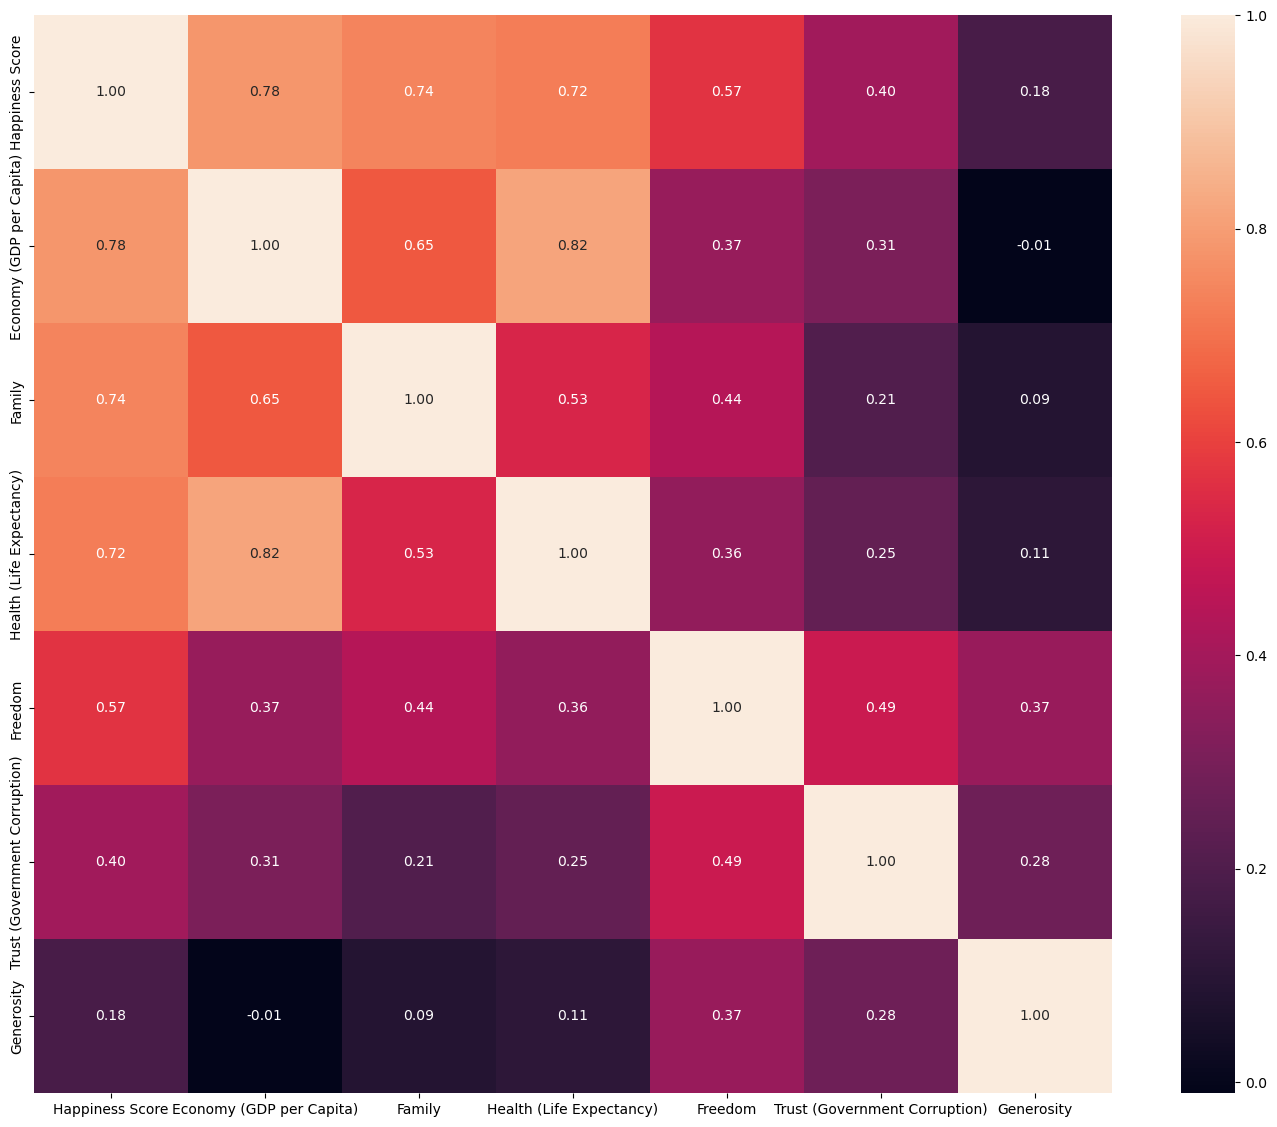

In [10]:
#Finding the corelation between label and feature
correlation=data.corr()
plt.figure(figsize=(18,14))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10})

##eventhough we have high corelation with economy,Health but they are important for us to predict the Happy score

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

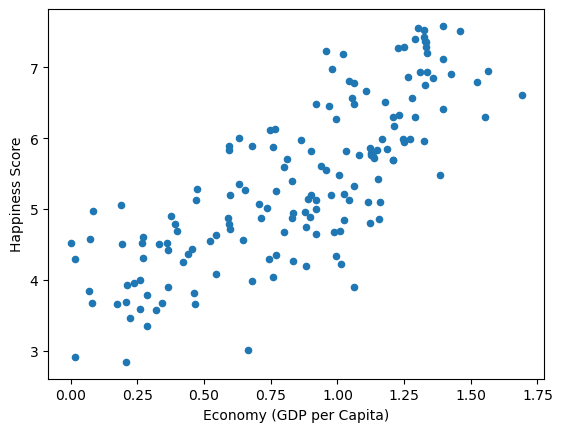

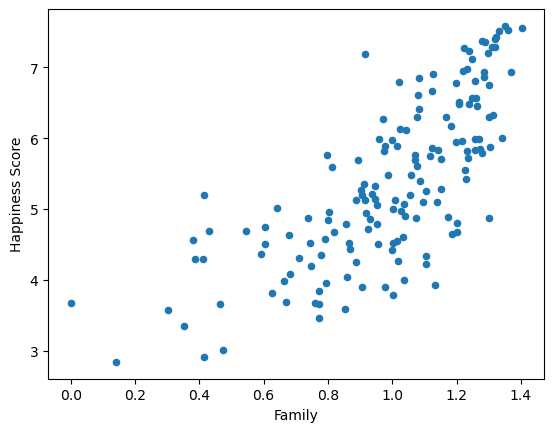

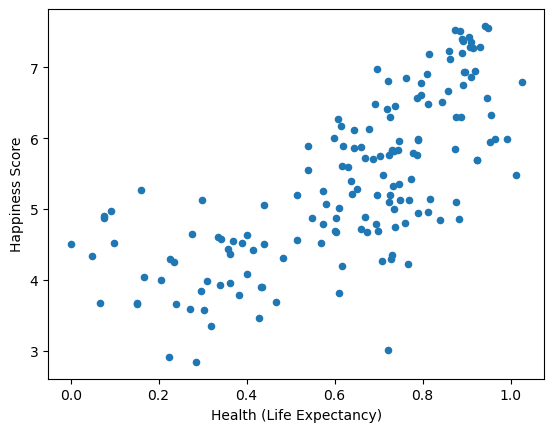

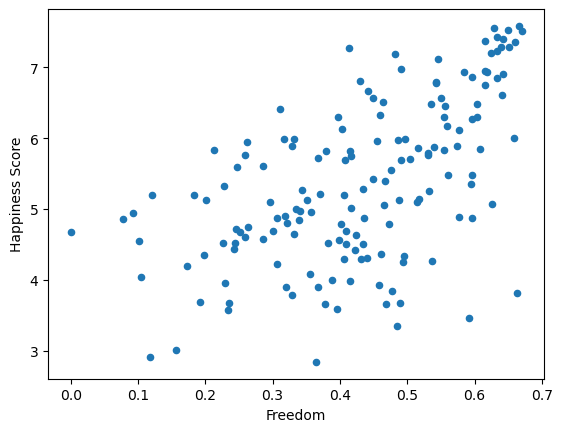

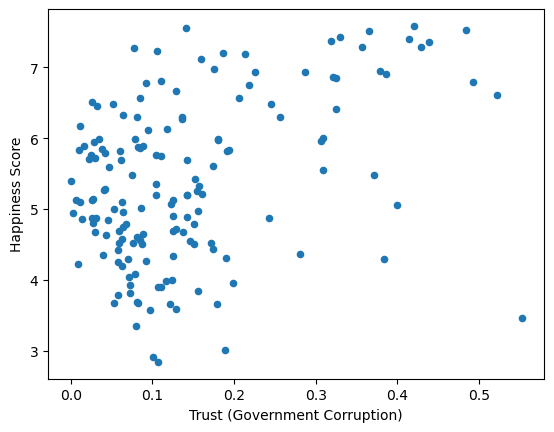

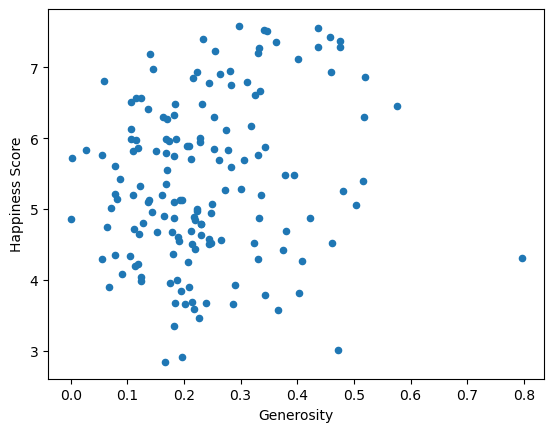

In [11]:


data.plot(kind='scatter',x='Economy (GDP per Capita)',y='Happiness Score')
data.plot(kind='scatter',x='Family',y='Happiness Score')
data.plot(kind='scatter',x='Health (Life Expectancy)',y='Happiness Score')
data.plot(kind='scatter',x='Freedom',y='Happiness Score')
data.plot(kind='scatter',x='Trust (Government Corruption)',y='Happiness Score')
data.plot(kind='scatter',x='Generosity',y='Happiness Score')

## 
from the Scattered plot we can see Generosity is not strongly corelated

In [12]:
###scaling the data and splitting label and features

y=data['Happiness Score']
x=data.drop('Happiness Score',axis=1)

In [13]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x))


In [14]:
print(x)

            0         1         2         3         4         5
0    0.826132  0.962403  0.918244  0.993789  0.760595  0.372895
1    0.770412  1.000000  0.924496  0.938841  0.256292  0.548198
2    0.784113  0.970297  0.853099  0.969615  0.876175  0.428947
3    0.863099  0.949167  0.863409  1.000000  0.661394  0.435983
4    0.784592  0.943219  0.883326  0.945112  0.597144  0.575602
..        ...       ...       ...       ...       ...       ...
153  0.131376  0.551764  0.418083  0.883953  1.000000  0.284314
154  0.169573  0.252355  0.311241  0.723426  0.145132  0.229432
155  0.392329  0.338668  0.704150  0.234184  0.342556  0.592790
156  0.009051  0.296578  0.218444  0.176937  0.182312  0.247864
157  0.123449  0.099805  0.277425  0.544294  0.194434  0.209592

[158 rows x 6 columns]


In [15]:
###Training and Testing of data
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [16]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [17]:
print(f'Regression R2 : {model.score(x_test,y_test)}')

Regression R2 : 0.7807858760393347


In [18]:
###Dumping file using pickle method
import pickle
filename="world_hapiness.pkl"
pickle.dump(model,open(filename,'wb'))

###CONCLUSION:
    THe score is 78% so its pretty good and works well with Linear regression

